In [4]:
## Q1 ##

In [ ]:
# 1a #

Text(0, 0.5, 'Population Proportion')

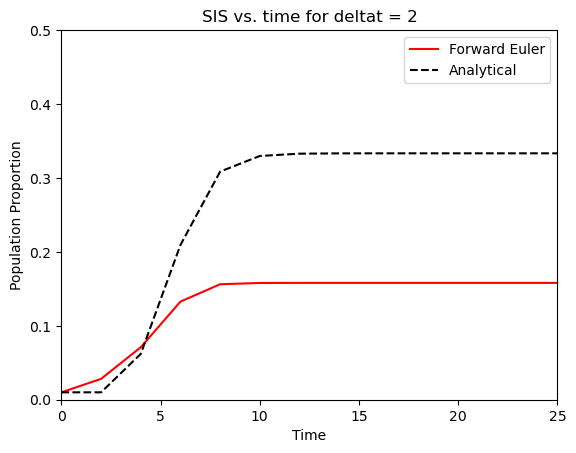

In [127]:
import numpy as np
def SIS(S0, I0, gamma, beta, total_time, deltat):
    S = [S0]
    I = [I0]
    T = [0]

    while T[-1] < total_time: 
        S.append(S[-1] + deltat * (-B * S[-1] * I[-1] + G * I[-1]))
        I.append(I[-1] + deltat * (B * S[-1] * I[-1] - G * I[-1]))
        T.append(T[-1] + deltat)
    return S, I, T

def analytical(I0, gamma, beta, total_time, deltat):
    T = [0]
    ana = [(1 - 1 / (B / G)) / (1 + (1 - 1 / (B / G) - I0) / I0)]
    while T[-1] < total_time:
         ana.append((1 - 1 / (B / G)) / (1 + (1 - 1 / (B / G) - I0) / I0 * np.exp(-1 * (B - G) * T[-1])))
         T.append(T[-1] + deltat)
    return ana

S, I, T = SIS(0.99, 0.01, 2, 3, 25, 2)
ana = analytical(0.01, 2, 3, 25, 2)

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(T, I, color = 'red', label = 'Forward Euler')
ax.plot(T, ana, color = 'black', linestyle = 'dashed', label = 'Analytical')
ax.axis([0, 25, 0, 0.5])
ax.legend()
plt.title('SIS vs. time for deltat = 2')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

Text(0, 0.5, 'Population Proportion')

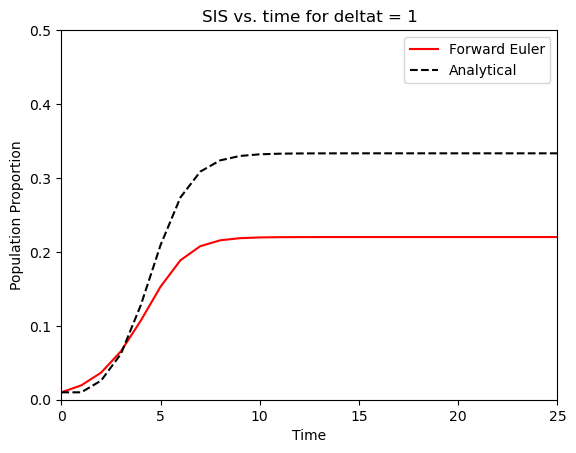

In [114]:
S, I, T = SIS(0.99, 0.01, 2, 3, 25, 1)
ana = analytical(0.01, 2, 3, 25, 1)

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(T, I, color = 'red', label = 'Forward Euler')
ax.plot(T, ana, color = 'black', linestyle = 'dashed', label = 'Analytical')
ax.axis([0, 25, 0, 0.5])
ax.legend()
plt.title('SIS vs. time for deltat = 1')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

Text(0, 0.5, 'Population Proportion')

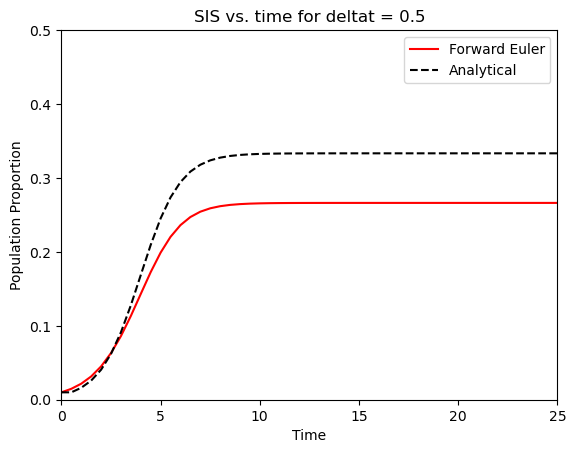

In [116]:
S, I, T = SIS(0.99, 0.01, 2, 3, 25, 0.5)
ana = analytical(0.01, 2, 3, 25, 0.5)

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(T, I, color = 'red', label = 'Forward Euler')
ax.plot(T, ana, color = 'black', linestyle = 'dashed', label = 'Analytical')
ax.axis([0, 25, 0, 0.5])
ax.legend()
plt.title('SIS vs. time for deltat = 0.5')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

In [ ]:
# 1c #

In [141]:
def E_deltat(S0, I0, gamma, beta, total_time, deltat):
    S, I, T = SIS(S0, I0, gamma, beta, total_time, deltat)
    ana = analytical(I0, gamma, beta, total_time, deltat)
    E_deltat = max(abs(np.subtract(I, ana)))
    return E_deltat

In [143]:
E_deltat(0.99, 0.01, 2, 3, 25, 0.5)

0.06708170197694213

In [ ]:
# 1d #

Text(0, 0.5, 'E(deltat)')

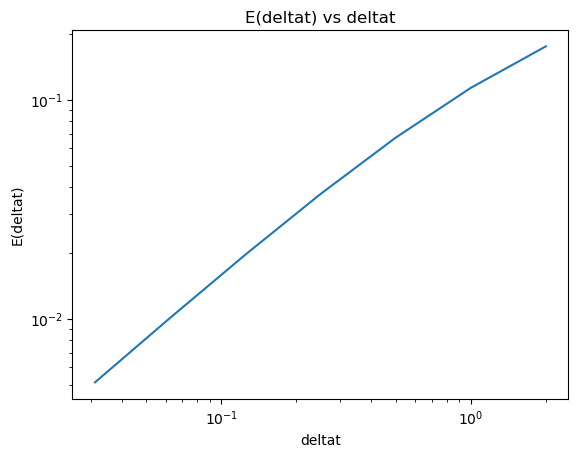

In [162]:
deltaT = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
E_deltaT = []
i = 0
while i < 7:
    E_deltaT.append(E_deltat(0.99, 0.01, 2, 3, 25, deltaT[i]))
    i += 1

fig,ax = plt.subplots()
ax.plot(deltaT, E_deltaT)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('E(deltat) vs deltat')
ax.set_xlabel('deltat') 
ax.set_ylabel('E(deltat)')

In [2]:
## Q2 ##

In [6]:
# 2b #

Text(0, 0.5, 'Population Proportion')

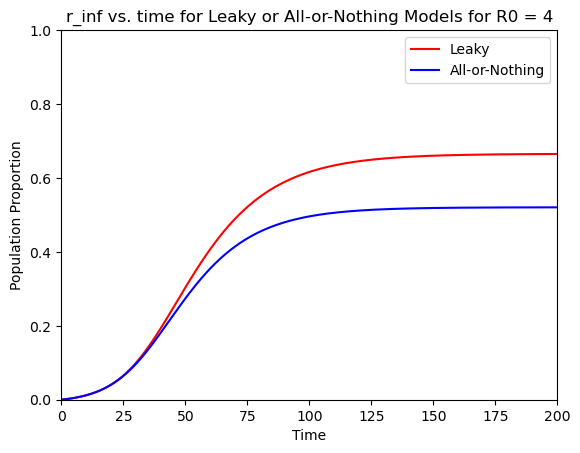

In [18]:
import numpy as np
def leaky(S0, I0, V0, gamma, beta, total_time, deltat, VE):
    s = [S0]
    i = [I0]
    r = [0]
    v = [V0]
    T = [0]

    while T[-1] < total_time: 
        s.append(s[-1] + deltat * (-beta * s[-1] * i[-1]))
        i.append(i[-1] + deltat * (beta * s[-1] * i[-1] + beta * (1 - VE) * v[-1] * i[-1] - gamma * i[-1]))
        r.append(r[-1] + deltat * (gamma * i[-1]))
        v.append(v[-1] + deltat * (-beta * (1 - VE) * v[-1] * i[-1]))
        T.append(T[-1] + deltat)
    return s, i, r, v, T
def aon(S0, I0, V0, gamma, beta, total_time, deltat, VE):
    s = [S0]
    i = [I0]
    r = [0]
    v_0 = [V0 * (1 - VE)]
    v_all = [V0 * VE]
    T = [0]

    while T[-1] < total_time: 
        s.append(s[-1] + deltat * (-beta * s[-1] * i[-1]))
        i.append(i[-1] + deltat * (beta * s[-1] * i[-1] + beta * v_0[-1] * i[-1] - gamma * i[-1]))
        r.append(r[-1] + deltat * (gamma * i[-1]))
        v_0.append(v_0[-1] + deltat * (-beta * v_0[-1] * i[-1]))
        v_all.append(v_all[-1])
        T.append(T[-1] + deltat)
    return s, i, r, v_0, v_all, T

sL, iL, rL, vL, TL = leaky(0.49, 0.01, 0.5, 1/14, 4/14, 200, 0.5, 0.8)
sAN, iAN, rAN, v_0AN, v_allAN, TAN = aon(0.49, 0.01, 0.5, 1/14, 4/14, 200, 0.5, 0.8)

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(TL, rL, color = 'red', label = 'Leaky')
ax.plot(TAN, rAN, color = 'blue', label = 'All-or-Nothing')
ax.axis([0, 200, 0, 1])
ax.legend()
plt.title('r_inf vs. time for Leaky or All-or-Nothing Models for R0 = 4')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

Text(0, 0.5, 'Population Proportion')

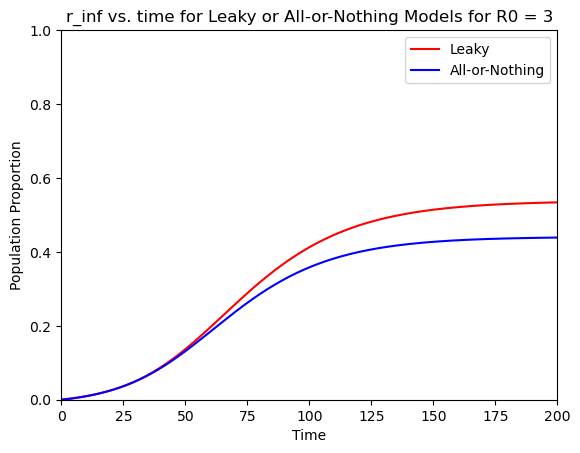

In [22]:
sL, iL, rL, vL, TL = leaky(0.49, 0.01, 0.5, 1/14, 3/14, 200, 0.5, 0.8)
sAN, iAN, rAN, v_0AN, v_allAN, TAN = aon(0.49, 0.01, 0.5, 1/14, 3/14, 200, 0.5, 0.8)

fig,ax = plt.subplots()
ax.plot(TL, rL, color = 'red', label = 'Leaky')
ax.plot(TAN, rAN, color = 'blue', label = 'All-or-Nothing')
ax.axis([0, 200, 0, 1])
ax.legend()
plt.title('r_inf vs. time for Leaky or All-or-Nothing Models for R0 = 3')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

Text(0, 0.5, 'Population Proportion')

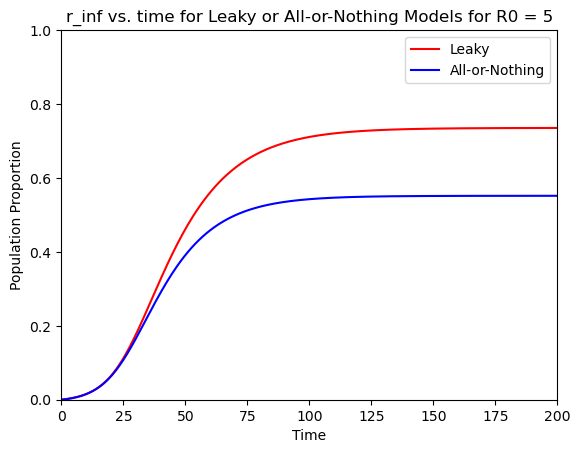

In [26]:
sL, iL, rL, vL, TL = leaky(0.49, 0.01, 0.5, 1/14, 5/14, 200, 0.5, 0.8)
sAN, iAN, rAN, v_0AN, v_allAN, TAN = aon(0.49, 0.01, 0.5, 1/14, 5/14, 200, 0.5, 0.8)

fig,ax = plt.subplots()
ax.plot(TL, rL, color = 'red', label = 'Leaky')
ax.plot(TAN, rAN, color = 'blue', label = 'All-or-Nothing')
ax.axis([0, 200, 0, 1])
ax.legend()
plt.title('r_inf vs. time for Leaky or All-or-Nothing Models for R0 = 5')
ax.set_xlabel('Time') 
ax.set_ylabel('Population Proportion')

In [2]:
# 2c #

Text(0, 0.5, 'Population')

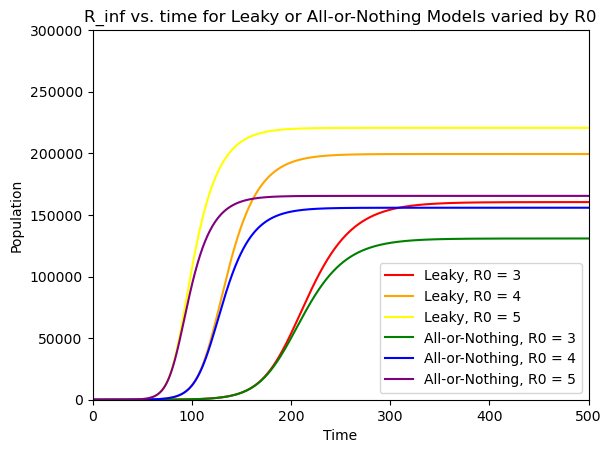

In [19]:
import numpy as np
def leaky(S0, I0, V0, N, gamma, beta, total_time, deltat, VE):
    S = [S0]
    I = [I0]
    R = [0]
    V = [V0]
    T = [0]

    while T[-1] < total_time: 
        S.append(S[-1] + deltat * (-beta * S[-1] * I[-1] / N))
        I.append(I[-1] + deltat * (beta * S[-1] * I[-1] / N + beta * (1 - VE) * V[-1] * I[-1] / N - gamma * I[-1]))
        R.append(R[-1] + deltat * (gamma * I[-1]))
        V.append(V[-1] + deltat * (-beta * (1 - VE) * V[-1] * I[-1] / N))
        T.append(T[-1] + deltat)
    return S, I, R, V, T
def aon(S0, I0, V0, N, gamma, beta, total_time, deltat, VE):
    S = [S0]
    I = [I0]
    R = [0]
    V_0 = [V0 * (1 - VE)]
    V_all = [V0 * VE]
    T = [0]

    while T[-1] < total_time: 
        S.append(S[-1] + deltat * (-beta * S[-1] * I[-1] / N))
        I.append(I[-1] + deltat * (beta * S[-1] * I[-1] / N + beta * V_0[-1] * I[-1] / N- gamma * I[-1]))
        R.append(R[-1] + deltat * (gamma * I[-1]))
        V_0.append(V_0[-1] + deltat * (-beta * V_0[-1] * I[-1] / N))
        V_all.append(V_all[-1])
        T.append(T[-1] + deltat)
    return S, I, R, V_0, V_all, T

SL3, IL3, RL3, VL3, TL3 = leaky(149999, 1, 150000, 300000, 1/14, 3/14, 500, 0.5, 0.8)
SAN3, IAN3, RAN3, V_0AN3, V_allAN3, TAN3 = aon(149999, 1, 150000, 300000, 1/14, 3/14, 500, 0.5, 0.8)
SL4, IL4, RL4, VL4, TL4 = leaky(149999, 1, 150000, 300000, 1/14, 4/14, 500, 0.5, 0.8)
SAN4, IAN4, RAN4, V_0AN4, V_allAN4, TAN4 = aon(149999, 1, 150000, 300000, 1/14, 4/14, 500, 0.5, 0.8)
SL5, IL5, RL5, VL5, TL5 = leaky(149999, 1, 150000, 300000, 1/14, 5/14, 500, 0.5, 0.8)
SAN5, IAN5, RAN5, V_0AN5, V_allAN5, TAN5 = aon(149999, 1, 150000, 300000, 1/14, 5/14, 500, 0.5, 0.8)

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(TL3, RL3, color = 'red', label = 'Leaky, R0 = 3')
ax.plot(TL4, RL4, color = 'orange', label = 'Leaky, R0 = 4')
ax.plot(TL5, RL5, color = 'yellow', label = 'Leaky, R0 = 5')
ax.plot(TAN3, RAN3, color = 'green', label = 'All-or-Nothing, R0 = 3')
ax.plot(TAN4, RAN4, color = 'blue', label = 'All-or-Nothing, R0 = 4')
ax.plot(TAN5, RAN5, color = 'purple', label = 'All-or-Nothing, R0 = 5')
ax.axis([0, 500, 0, 300000])
ax.legend()
plt.title('R_inf vs. time for Leaky or All-or-Nothing Models varied by R0')
ax.set_xlabel('Time') 
ax.set_ylabel('Population')

Text(0, 0.5, 'Population')

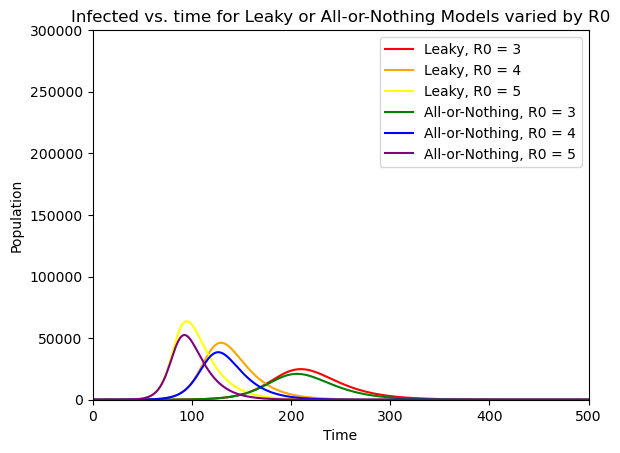

In [21]:
fig,ax = plt.subplots()
ax.plot(TL3, IL3, color = 'red', label = 'Leaky, R0 = 3')
ax.plot(TL4, IL4, color = 'orange', label = 'Leaky, R0 = 4')
ax.plot(TL5, IL5, color = 'yellow', label = 'Leaky, R0 = 5')
ax.plot(TAN3, IAN3, color = 'green', label = 'All-or-Nothing, R0 = 3')
ax.plot(TAN4, IAN4, color = 'blue', label = 'All-or-Nothing, R0 = 4')
ax.plot(TAN5, IAN5, color = 'purple', label = 'All-or-Nothing, R0 = 5')
ax.axis([0, 500, 0, 300000])
ax.legend()
plt.title('Infected vs. time for Leaky or All-or-Nothing Models varied by R0')
ax.set_xlabel('Time') 
ax.set_ylabel('Population')